# Exercises: Tidy Data
<a href = "https://ds.codeup.com/classification/tidy-data/#exercises">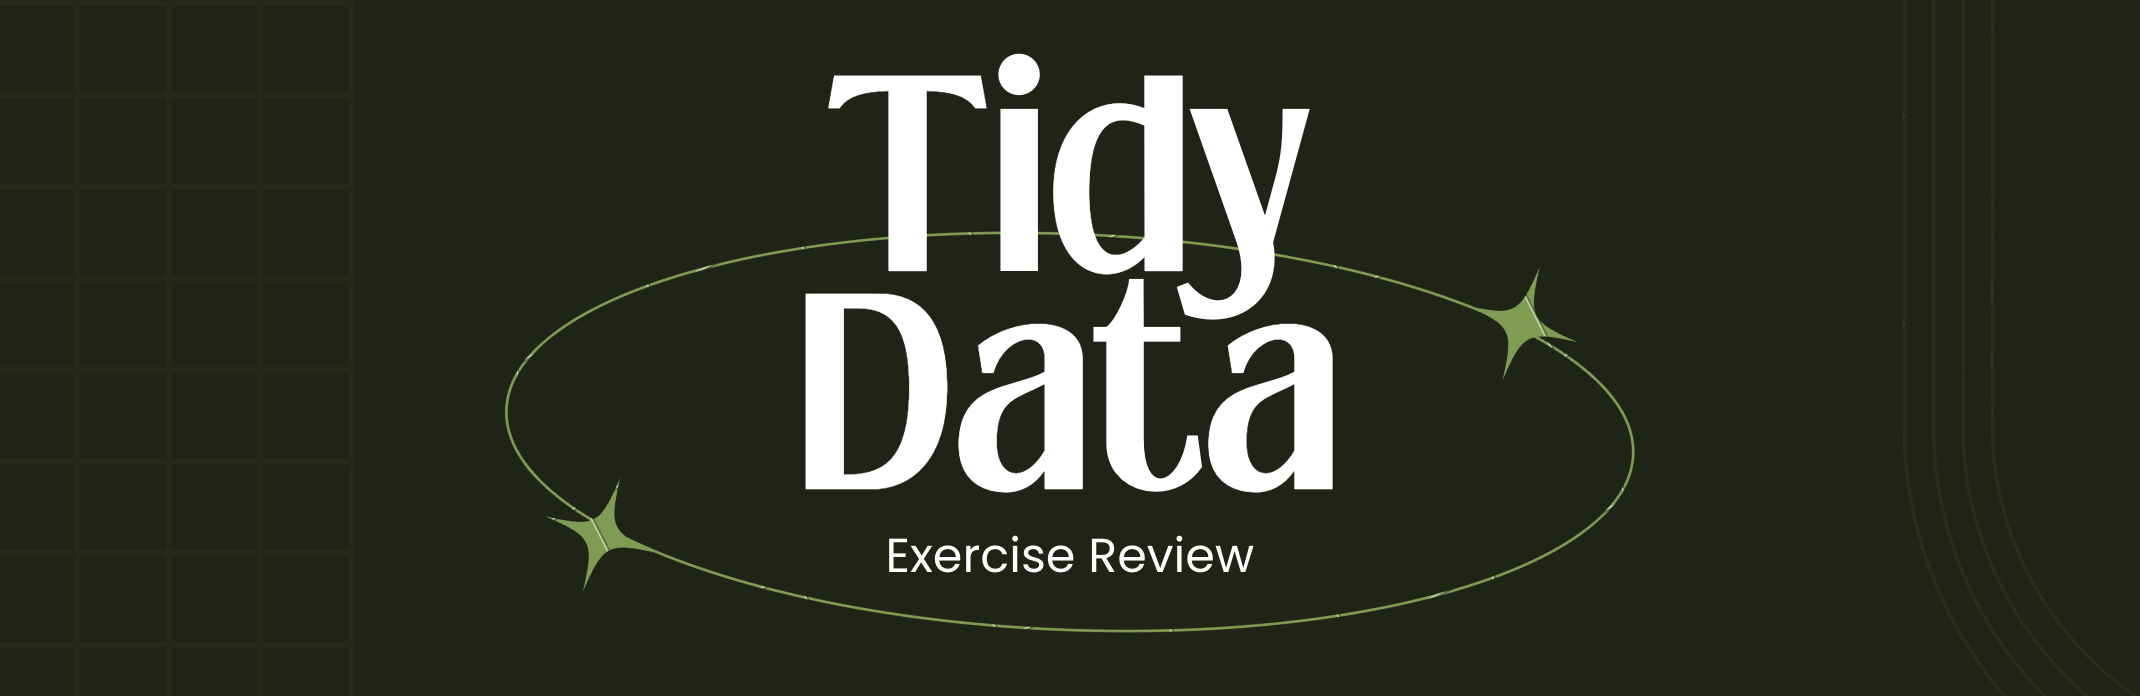</a>

<hr style="border:2px solid gray">

Do your work for this exercise in a jupyter notebook or python script named tidy_data. Save this work in your `classification-exercises` repo. Add, commit, and push your changes.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

# 1. <a href="https://gist.githubusercontent.com/o0amandagomez0o/20c8edc2cb83d33da03c8fd2f9db4c4c/raw/attendance.csv">Attendance Data</a>


## Read the data from the `attendance` table and calculate an attendance percentage for each student. 
- ### One half day is worth 50% of a full day
- ### 10 tardies is equal to one absence.

You should end up with something like this:

```python:
name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade, dtype: float64
```

In [4]:
att = pd.read_csv('https://gist.githubusercontent.com/o0amandagomez0o/20c8edc2cb83d33da03c8fd2f9db4c4c/raw/attendance.csv')

In [5]:
att.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [6]:
att = att.rename(columns={'Unnamed: 0': 'name'})

In [7]:
att.head()

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


<div class = "alert alert-success" role="alert">

#### Recall: pd.melt arguments
- `id_vars` = columns you want to keep (not melt)
- `var_name` = name of new column you created by melting columns
- `value_name` = column name for values

</div>

In [8]:
# let's take this WIDE table to a long one

att = att.melt(id_vars='name', 
                  var_name='date',
                  value_name='attend')

In [9]:
att.head()

,name,date,attend
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [10]:
# Convert variables to values
att.attend = att.attend.map({'P':1, 'A':0, 'H':.5, 'T':.9})

In [11]:
att

,name,date,attend
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9
5,Jane,2018-01-02,1.0
6,Billy,2018-01-02,0.9
7,John,2018-01-02,0.9
8,Sally,2018-01-03,0.9
9,Jane,2018-01-03,0.9


In [12]:
att.groupby('name').mean()

,attend
name,
Billy,0.5250
Jane,0.6875
John,0.9125
Sally,0.7625


# 2. <a href="https://gist.githubusercontent.com/o0amandagomez0o/f6ea956fedae90420fd2ce4bd382ea8a/raw/coffee_levels.csv">Coffee Levels</a>

## 2a. Read the `coffee_levels` table.

In [13]:
cl = pd.read_csv('https://gist.githubusercontent.com/o0amandagomez0o/f6ea956fedae90420fd2ce4bd382ea8a/raw/coffee_levels.csv')
cl.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [14]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           30 non-null     int64  
 1   coffee_carafe  30 non-null     object 
 2   coffee_amount  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


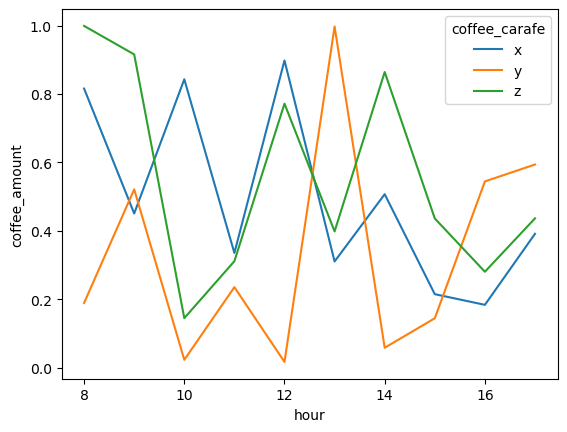

In [34]:
sns.lineplot(data=cl, x='hour', y='coffee_amount', hue='coffee_carafe')
plt.show()

## 2b. Transform the data so that each carafe is in it's own column.

<div class = "alert alert-success" role="alert">

#### **Recall**: pd.pivot arguments
- `Index` = columns you want to keep (not pivot)
- `columns` = column you want to pivot
- `values` = values we want to populate in the new columns

</div>

In [27]:
cl.pivot(index='hour',
            columns='coffee_carafe',
            values='coffee_amount')

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


In [35]:
clp = cl.pivot(index='hour',
            columns='coffee_carafe',
            values='coffee_amount')

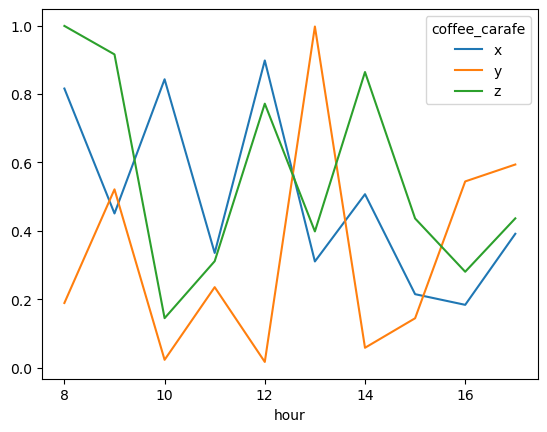

In [36]:
clp.plot()
plt.show()

## 2c. Is this the best shape for the data?

**It depends**

- If it's going to be loaded into a database, `clp` has the best structure as each observation is representing the coffee levels for each carafe per hour

- Although if you are exploring the data, `cl` is easier to manipulate:

In [21]:
pd.DataFrame(cl.groupby('coffee_carafe').coffee_amount.mean())

,coffee_amount
coffee_carafe,
x,0.495278
y,0.332577
z,0.556027


In [25]:
clp.x.mean()

0.49527780861813975

# 3. <a href="https://gist.githubusercontent.com/o0amandagomez0o/6bb870ddd6cae613999b9cf33ac41c33/raw/cake_recipes.csv">Cake Recipes</a>

## 3a. Read the `cake_recipes` table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

In [37]:
cr = pd.read_csv("https://gist.githubusercontent.com/o0amandagomez0o/6bb870ddd6cae613999b9cf33ac41c33/raw/cake_recipes.csv")

In [38]:
cr

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


## 3b. Tidy the data as necessary.

In [39]:
cr = cr.melt(id_vars='recipe:position', var_name='temp', value_name='score')

In [40]:
cr

,recipe:position,temp,score
0,a:bottom,225,61.738655
1,a:top,225,51.709751
2,b:bottom,225,57.095320
3,b:top,225,82.455004
4,c:bottom,225,96.470207
5,c:top,225,71.306308
6,d:bottom,225,52.799753
7,d:top,225,96.873178
8,a:bottom,250,53.912627
9,a:top,250,52.009735


In [42]:
cr[['recipe','position']] = cr['recipe:position'].str.split(':', expand=True)

In [43]:
cr = cr.drop(columns='recipe:position')

In [45]:
cr

,temp,score,recipe,position
0,225,61.738655,a,bottom
1,225,51.709751,a,top
2,225,57.095320,b,bottom
3,225,82.455004,b,top
4,225,96.470207,c,bottom
5,225,71.306308,c,top
6,225,52.799753,d,bottom
7,225,96.873178,d,top
8,250,53.912627,a,bottom
9,250,52.009735,a,top


## 3c. Which recipe, on average, is the best? 

In [46]:
cr.groupby('recipe').mean()

,score
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


In [47]:
cr.groupby('recipe').mean().idxmax()

score    b
dtype: object

In [54]:
cr.groupby('recipe').mean().max()

score    76.736074
dtype: float64

## 3d. Which oven temperature, on average, produces the best results?

In [48]:
cr.groupby('temp').mean()

,score
temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


In [49]:
cr.groupby('temp').mean().idxmax()

score    275
dtype: object

In [50]:
cr.groupby('temp').mean().sort_values('score').tail(1)

,score
temp,
275,74.886754


## 3e. Which combination of recipe, rack position, and temperature gives the best result?

In [52]:
cr.groupby(['recipe','position','temp']).mean()

score
recipe position temp           
a      bottom   225   61.738655
                250   53.912627
                275   74.414730
                300   98.786784
       top      225   51.709751
                250   52.009735
                275   68.576858
                300   50.228470
b      bottom   225   57.095320
                250   61.904369
                275   61.196980
                300   99.248541
       top      225   82.455004
                250   95.224151
                275   98.594881
                300   58.169349
c      bottom   225   96.470207
                250   52.001358
                275   92.893227
                300   65.473084
       top      225   71.306308
                250   82.795477
                275   92.098049
                300   53.960273
d      bottom   225   52.799753
                250   58.670419
                275   51.747686
                300   56.183110
       top      225   96.873178
                250   76.101363
                275   59.571620
                300   50.971626

In [53]:
cr.groupby(['recipe','position','temp']).mean().idxmax()

score    (b, bottom, 300)
dtype: object

In [55]:
cr.groupby(['recipe','position','temp']).mean().sort_values('score').tail(1)

,,,score
recipe,position,temp,
b,bottom,300,99.248541
